In [ ]:
## github minCien -->  n°81

In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

In [28]:
rc = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv', na_values=['*'])

In [29]:
rc.head()

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015


In [30]:
## HDI = indice desarrollo humano

In [31]:
rc = rc[["comuna","HDI"]]

In [32]:
rc.head()

,comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015


In [282]:
pob = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv', na_values=['*'])

In [283]:
pob.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0.0,0.0,15.0,0.0
1,1101,NaN,NaN,54.0,10.0
2,1101,NaN,0.0,28.0,NaN
3,1101,NaN,7.0,49.0,NaN
4,1101,NaN,NaN,26.0,7.0


In [284]:
#como de los 0 a 15 años no se han vacunado, se quita columna

In [285]:
pob = pob[["COMUNA","EDAD_15A64", "EDAD_65YMAS"]]

In [286]:
pob.head()

,COMUNA,EDAD_15A64,EDAD_65YMAS
0,1101,15.0,0.0
1,1101,54.0,10.0
2,1101,28.0,NaN
3,1101,49.0,NaN
4,1101,26.0,7.0


In [287]:
pob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180499 entries, 0 to 180498
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   COMUNA       180499 non-null  int64  
 1   EDAD_15A64   175439 non-null  float64
 2   EDAD_65YMAS  130173 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 4.1 MB


In [288]:
pob.COMUNA = pob.COMUNA.astype('object')

In [289]:
pob.columns=['Codigo comuna', 'pob15a64', 'pob65amas']

In [290]:
pob.head()

,Codigo comuna,pob15a64,pob65amas
0,1101,15.0,0.0
1,1101,54.0,10.0
2,1101,28.0,NaN
3,1101,49.0,NaN
4,1101,26.0,7.0


In [291]:
pob = pob.groupby(by="Codigo comuna").sum()

In [292]:
pob.head()

,pob15a64,pob65amas
Codigo comuna,,
1101,132629.0,16895.0
1107,72866.0,3908.0
1401,9446.0,864.0
1402,772.0,136.0
1403,1246.0,148.0


In [357]:
vac = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_1eraDosis.csv', na_values=['*'])

In [358]:
vac.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,15,16,17,18,19,...,71,72,73,74,75,76,77,78,79,80
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,487.0,688.0,...,1364.0,1321.0,1297.0,1213.0,1149.0,991.0,1054.0,896.0,745.0,5060.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,1.0,2.0,...,3.0,22.0,11.0,17.0,6.0,5.0,6.0,5.0,6.0,27.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,1.0,0.0,...,2.0,7.0,2.0,4.0,4.0,2.0,3.0,4.0,2.0,10.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,2.0,...,9.0,11.0,2.0,12.0,10.0,4.0,9.0,9.0,8.0,51.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
vac = vac[vac["Codigo region"] == 13]

In [360]:
vac.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,15,16,17,18,19,...,71,72,73,74,75,76,77,78,79,80
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,17.0,19.0,...,63.0,40.0,44.0,35.0,34.0,37.0,26.0,31.0,22.0,187.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,227.0,275.0,...,596.0,537.0,482.0,433.0,413.0,415.0,368.0,353.0,301.0,2156.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,92.0,73.0,...,193.0,189.0,143.0,149.0,131.0,144.0,125.0,106.0,73.0,711.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,160.0,137.0,...,454.0,473.0,493.0,507.0,379.0,427.0,385.0,376.0,392.0,2364.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,256.0,340.0,...,817.0,778.0,734.0,682.0,718.0,633.0,589.0,558.0,496.0,3077.0


In [361]:
vac.loc[:,'vac15a64']= vac.iloc[:,5:54].sum(axis=1)

In [362]:
vac.loc[:,'vac65a80']= vac.iloc[:,55:71].sum(axis=1)

In [363]:
vac.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,15,16,17,18,19,...,73,74,75,76,77,78,79,80,vac15a64,vac65a80
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,17.0,19.0,...,44.0,35.0,34.0,37.0,26.0,31.0,22.0,187.0,4225.0,859.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,227.0,275.0,...,482.0,433.0,413.0,415.0,368.0,353.0,301.0,2156.0,57197.0,10212.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,92.0,73.0,...,143.0,149.0,131.0,144.0,125.0,106.0,73.0,711.0,16429.0,3379.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,160.0,137.0,...,493.0,507.0,379.0,427.0,385.0,376.0,392.0,2364.0,36835.0,9638.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,256.0,340.0,...,734.0,682.0,718.0,633.0,589.0,558.0,496.0,3077.0,52506.0,14024.0


In [364]:
vc = vac[["Comuna","Codigo comuna", "Poblacion","vac15a64","vac65a80"]]

In [365]:
vc.head()

,Comuna,Codigo comuna,Poblacion,vac15a64,vac65a80
88,Alhue,13502.0,7405.0,4225.0,859.0
89,Buin,13402.0,109641.0,57197.0,10212.0
90,Calera de Tango,13403.0,28525.0,16429.0,3379.0
91,Cerrillos,13102.0,88956.0,36835.0,9638.0
92,Cerro Navia,13103.0,142465.0,52506.0,14024.0


In [366]:
pob.head()

,Codigo comuna,pob15a64,pob65a80
88,13502.0,4857.0,940.0
89,13402.0,72363.0,10443.0
90,13403.0,18843.0,2947.0
91,13102.0,57440.0,10745.0
92,13103.0,89993.0,18885.0


In [367]:
rc.head()

,Codigo comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015


In [368]:
rc.columns = ['Codigo comuna','HDI']

In [369]:
vc1 = pd.merge(rc, vc ,how='right', on='Codigo comuna')

In [370]:
vc1.head()

,Codigo comuna,HDI,Comuna,Poblacion,vac15a64,vac65a80
0,13502.0,0.742609,Alhue,7405.0,4225.0,859.0
1,13402.0,0.766439,Buin,109641.0,57197.0,10212.0
2,13403.0,0.715509,Calera de Tango,28525.0,16429.0,3379.0
3,13102.0,0.764616,Cerrillos,88956.0,36835.0,9638.0
4,13103.0,0.718874,Cerro Navia,142465.0,52506.0,14024.0


In [371]:
vc2 = pd.merge(pob, vc1 ,how='right', on='Codigo comuna')

In [372]:
vc2.head()

,Codigo comuna,pob15a64,pob65a80,HDI,Comuna,Poblacion,vac15a64,vac65a80
0,13502.0,4857.0,940.0,0.742609,Alhue,7405.0,4225.0,859.0
1,13402.0,72363.0,10443.0,0.766439,Buin,109641.0,57197.0,10212.0
2,13403.0,18843.0,2947.0,0.715509,Calera de Tango,28525.0,16429.0,3379.0
3,13102.0,57440.0,10745.0,0.764616,Cerrillos,88956.0,36835.0,9638.0
4,13103.0,89993.0,18885.0,0.718874,Cerro Navia,142465.0,52506.0,14024.0


In [373]:
##los datos de poblacion no coinciden con el numero de vacunados, se procede a buscar otros datos de poblacion por edad

In [374]:
vac = vc2[["Codigo comuna", "Comuna", "Poblacion","HDI","vac15a64","vac65a80"]]

In [375]:
vac.head()

,Codigo comuna,Comuna,Poblacion,HDI,vac15a64,vac65a80
0,13502.0,Alhue,7405.0,0.742609,4225.0,859.0
1,13402.0,Buin,109641.0,0.766439,57197.0,10212.0
2,13403.0,Calera de Tango,28525.0,0.715509,16429.0,3379.0
3,13102.0,Cerrillos,88956.0,0.764616,36835.0,9638.0
4,13103.0,Cerro Navia,142465.0,0.718874,52506.0,14024.0


In [376]:
pob = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/poblacion_comuna_edad.csv', na_values=['*'])

In [377]:
pob.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,15,16,17,18,19,...,71,72,73,74,75,76,77,78,79,80
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,3549.0,3675.0,...,1587.0,1448.0,1394.0,1321.0,1241.0,1175.0,1094.0,982.0,880.0,6448.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,7.0,8.0,...,15.0,13.0,11.0,10.0,9.0,8.0,7.0,6.0,6.0,50.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,8.0,10.0,...,9.0,8.0,8.0,8.0,7.0,4.0,3.0,4.0,3.0,23.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,118.0,113.0,...,14.0,13.0,14.0,16.0,17.0,17.0,16.0,13.0,11.0,88.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [378]:
pob = pob[pob["Codigo region"] == 13]

In [379]:
pob.loc[:,'pob15a64']= pob.iloc[:,5:54].sum(axis=1)

In [380]:
pob.loc[:,'pob65a80']= pob.iloc[:,55:71].sum(axis=1)

In [381]:
pob.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,15,16,17,18,19,...,73,74,75,76,77,78,79,80,pob15a64,pob65a80
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,77.0,79.0,...,40.0,36.0,32.0,30.0,29.0,29.0,29.0,236.0,4857.0,940.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,1445.0,1430.0,...,502.0,461.0,414.0,381.0,348.0,323.0,296.0,2160.0,72363.0,10443.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,397.0,408.0,...,141.0,128.0,110.0,97.0,87.0,82.0,76.0,607.0,18843.0,2947.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,1216.0,1308.0,...,497.0,473.0,440.0,411.0,380.0,363.0,353.0,2538.0,57440.0,10745.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,1882.0,1964.0,...,963.0,901.0,827.0,756.0,683.0,626.0,565.0,3690.0,89993.0,18885.0


In [382]:
pob = pob[["Codigo comuna","pob15a64","pob65a80"]]

In [383]:
pob.head()

,Codigo comuna,pob15a64,pob65a80
88,13502.0,4857.0,940.0
89,13402.0,72363.0,10443.0
90,13403.0,18843.0,2947.0
91,13102.0,57440.0,10745.0
92,13103.0,89993.0,18885.0


In [384]:
vc = pd.merge(pob, vac ,how='right', on='Codigo comuna')

In [385]:
vc.head()

,Codigo comuna,pob15a64,pob65a80,Comuna,Poblacion,HDI,vac15a64,vac65a80
0,13502.0,4857.0,940.0,Alhue,7405.0,0.742609,4225.0,859.0
1,13402.0,72363.0,10443.0,Buin,109641.0,0.766439,57197.0,10212.0
2,13403.0,18843.0,2947.0,Calera de Tango,28525.0,0.715509,16429.0,3379.0
3,13102.0,57440.0,10745.0,Cerrillos,88956.0,0.764616,36835.0,9638.0
4,13103.0,89993.0,18885.0,Cerro Navia,142465.0,0.718874,52506.0,14024.0


In [386]:
vac = vc[["Codigo comuna", "Comuna", "Poblacion","pob15a64","pob65a80","HDI","vac15a64","vac65a80"]]

In [387]:
vac.head()

,Codigo comuna,Comuna,Poblacion,pob15a64,pob65a80,HDI,vac15a64,vac65a80
0,13502.0,Alhue,7405.0,4857.0,940.0,0.742609,4225.0,859.0
1,13402.0,Buin,109641.0,72363.0,10443.0,0.766439,57197.0,10212.0
2,13403.0,Calera de Tango,28525.0,18843.0,2947.0,0.715509,16429.0,3379.0
3,13102.0,Cerrillos,88956.0,57440.0,10745.0,0.764616,36835.0,9638.0
4,13103.0,Cerro Navia,142465.0,89993.0,18885.0,0.718874,52506.0,14024.0


In [388]:
##limpieza de datos lista, para los vacunados y la poblacion por edad se tomaron los mismos dos rangos de edad, de 15 a 64 y de 65 a 80.

In [389]:
vac['proppob15a64']=vac['pob15a64']/vac['Poblacion']

<ipython-input-389-7731dcede2b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['proppob15a64']=vac['pob15a64']/vac['Poblacion']


In [390]:
vac['proppob65a80']=vac['pob65a80']/vac['Poblacion']

<ipython-input-390-0bacf68b2790>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['proppob65a80']=vac['pob65a80']/vac['Poblacion']


In [391]:
vac['propvac15a64']=vac['vac15a64']/vac['pob15a64']

<ipython-input-391-235e1a757e3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['propvac15a64']=vac['vac15a64']/vac['pob15a64']


In [392]:
vac['propvac65a80']=vac['vac65a80']/vac['pob65a80']

<ipython-input-392-31478bbc6cbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['propvac65a80']=vac['vac65a80']/vac['pob65a80']


In [393]:
vac['pob15a80']=vac['pob15a64']+vac['pob65a80']

<ipython-input-393-faf50b5d14cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['pob15a80']=vac['pob15a64']+vac['pob65a80']


In [394]:
vac['vac15a80']=vac['vac15a64']+vac['vac65a80']

<ipython-input-394-b25a171b63bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['vac15a80']=vac['vac15a64']+vac['vac65a80']


In [395]:
vac['propvac15a80']=vac['vac15a80']/vac['pob15a80']

<ipython-input-395-55653247f16a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['propvac15a80']=vac['vac15a80']/vac['pob15a80']


In [396]:
vac.head()

,Codigo comuna,Comuna,Poblacion,pob15a64,pob65a80,HDI,vac15a64,vac65a80,proppob15a64,proppob65a80,propvac15a64,propvac65a80,pob15a80,vac15a80,propvac15a80
0,13502.0,Alhue,7405.0,4857.0,940.0,0.742609,4225.0,859.0,0.655908,0.126941,0.869879,0.913830,5797.0,5084.0,0.877005
1,13402.0,Buin,109641.0,72363.0,10443.0,0.766439,57197.0,10212.0,0.659999,0.095247,0.790418,0.977880,82806.0,67409.0,0.814059
2,13403.0,Calera de Tango,28525.0,18843.0,2947.0,0.715509,16429.0,3379.0,0.660578,0.103313,0.871889,1.146590,21790.0,19808.0,0.909041
3,13102.0,Cerrillos,88956.0,57440.0,10745.0,0.764616,36835.0,9638.0,0.645712,0.120790,0.641278,0.896975,68185.0,46473.0,0.681572
4,13103.0,Cerro Navia,142465.0,89993.0,18885.0,0.718874,52506.0,14024.0,0.631685,0.132559,0.583445,0.742600,108878.0,66530.0,0.611051


In [397]:
vacHDI = vac[['Comuna','propvac15a80','HDI']]

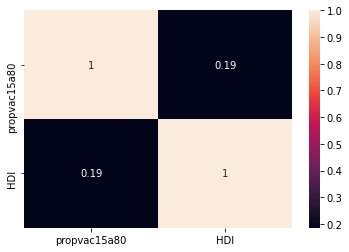

In [398]:
correlation_mat = vacHDI.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [ ]:
## se puede concluir que hay una correlacion, no precisamente fuerte, pero significativa, entre la cantidad de vacunados y la riqueza de la comuna, entre mas ricos, mas vacunados

In [412]:
vacEDAD = vac[['Comuna','proppob65a80','propvac15a80']]

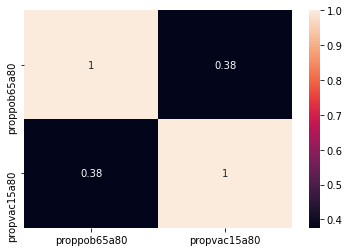

In [413]:
correlation_mat = vacEDAD.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

##### hay correlacion significativa y moderada entre las comunas con mayor proporcion de personas de mayor edad y el total de vacunados (entre 15 y 80 años), esto quiere decir que entre mayor es la proporcion de adultos mayores, mayor es la cantidad de vacunados de esta.

In [403]:
edadHDI = vac[['Comuna','HDI','proppob65a80']]

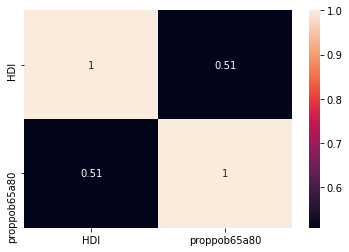

In [404]:
correlation_mat = edadHDI.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [ ]:
## hay correlacion significativa entre la proporcion de edad de adultos mayores y riqueza de la comuna, esto quiere decir que entre mayor proporcion de adultos mayores tiene la comuna, mayor es la riqueza de esta.

In [405]:
## todo junto:

In [415]:
Matriz_corr = vac[['Comuna','propvac65a80','propvac15a80','HDI','proppob65a80']]

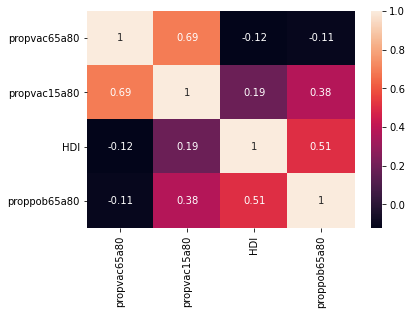

In [416]:
correlation_mat = Matriz_corr.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

Text(0.5, 1.0, 'correlacion vacunados y HDI = 0,19')

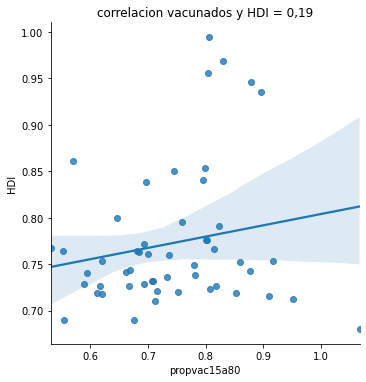

In [429]:
 graf_vacyHDI = sns.lmplot(x='propvac15a80', y='HDI', data=vac, palette='set1')
plt.title('correlacion vacunados y HDI = 0,19')

Text(0.5, 1.0, 'correlacion edad y vacunados = 0,38 ')

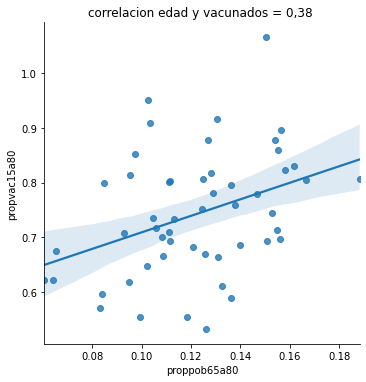

In [430]:
graf_vacyEDAD = sns.lmplot(x='proppob65a80', y='propvac15a80', data=vac, palette='set1')
plt.title('correlacion edad y vacunados = 0,38 ')

Text(0.5, 1.0, 'correlacion edad y HDI = 0,51 ')

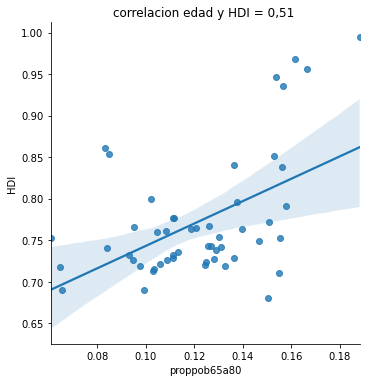

In [426]:
graf_HDIyEDAD = sns.lmplot(x='proppob65a80', y='HDI', data=vac, palette='set1')
plt.title('correlacion edad y HDI = 0,51 ')